In [1]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons

In [2]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_MISSING, default_batch_size=9)
imgTest, clsTest = gen.get_random_batch(batch_size=8)
# gen.plot_example(images=imgTest, labels=clsTest)

for img, cls in gen.batch_generator(training=False, batch_size=2048):
    print(f"Batch has size: Images: {img.shape}; Labels {cls.shape}")

Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (1808, 28, 28, 1); Labels (1808,)


In [3]:
#autoencoder = Autoencoder()
autoencoder = load_model('models/autoencoder.keras', custom_objects={'Autoencoder': Autoencoder})



encoded.shape (None, 4)


encoded.shape (8, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


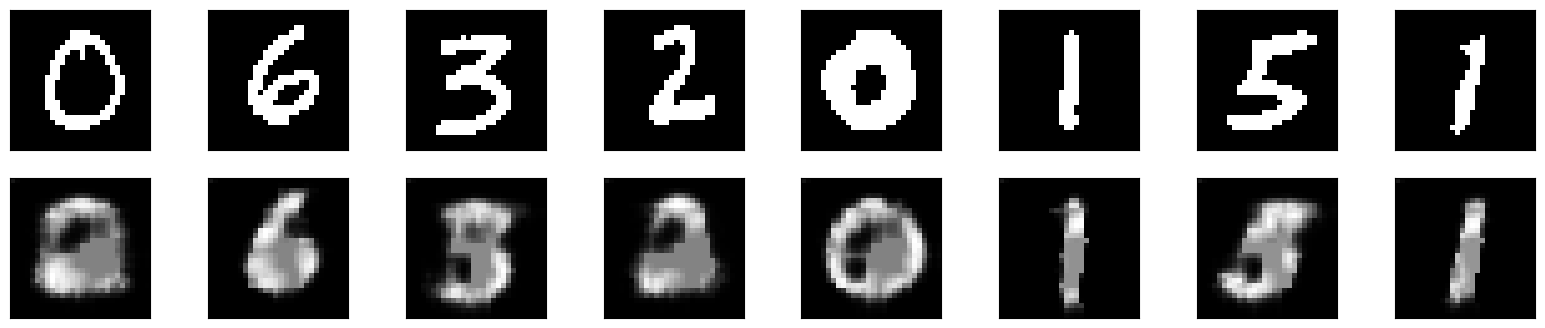

reconstructed_imgs.shape (8, 28, 28, 1)
generated_imgs.shape (8, 28, 28, 1)


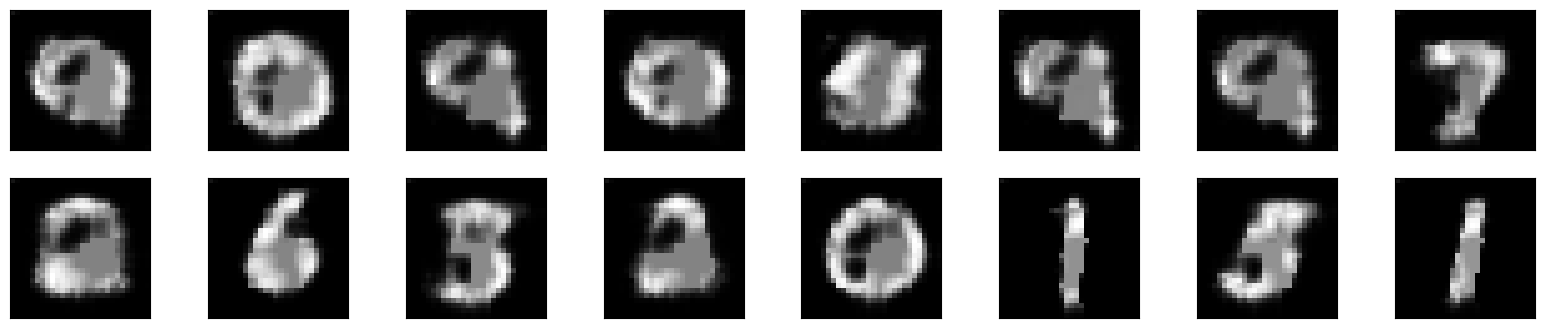

In [4]:
reconstructed_imgs = autoencoder.predict(imgTest)
plot_comparisons(imgTest, reconstructed_imgs)

# Generate 8 random noise images
# random_noise = np.random.rand(8, 28*28).reshape(8, 28, 28, 1)

print(f"reconstructed_imgs.shape {reconstructed_imgs.shape}")
generated_imgs = autoencoder.generate_images()
print(f"generated_imgs.shape {generated_imgs.shape}")
plot_comparisons(generated_imgs, reconstructed_imgs)